In [17]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [18]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
###The following columns have no information provided, and they seems to be incosistent with what 
## some of the data columns in the columns already have
for x in data.columns:
    if x[-4:] == "Rate":
        data = data.drop(x, axis =1)
###The following data does not provide any relevance to the data as they are either 
### all have the same number, or the value does not provide any information
data = data.drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], axis =1 )

In [19]:
pd.set_option('display.max_columns', 35)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [20]:
#There are no empty columns
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [21]:
#There are no duplicate rows
data.duplicated().any() 

False

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [23]:
##How many employees in the company?
data.shape

(1470, 28)

In [24]:
#What is the turnover rate? 
turnover_rate = data.Attrition.value_counts()/data.shape[0]
turnover_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [25]:
numerical_description = data.describe(include = [np.number])
numerical_columns = numerical_description.columns
numerical_description

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [26]:
categorical_description = data.describe(include = ['O'])
categorical_columns = categorical_description.columns
categorical_description

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [27]:
turnover_summary = data.groupby('Attrition')
turnover_summary.mean()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,
No,37.561233,8.915653,2.927007,2.771290,2.770479,2.145985,2.778589,6832.739659,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,10.632911,2.839662,2.464135,2.518987,1.637131,2.468354,4787.092827,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


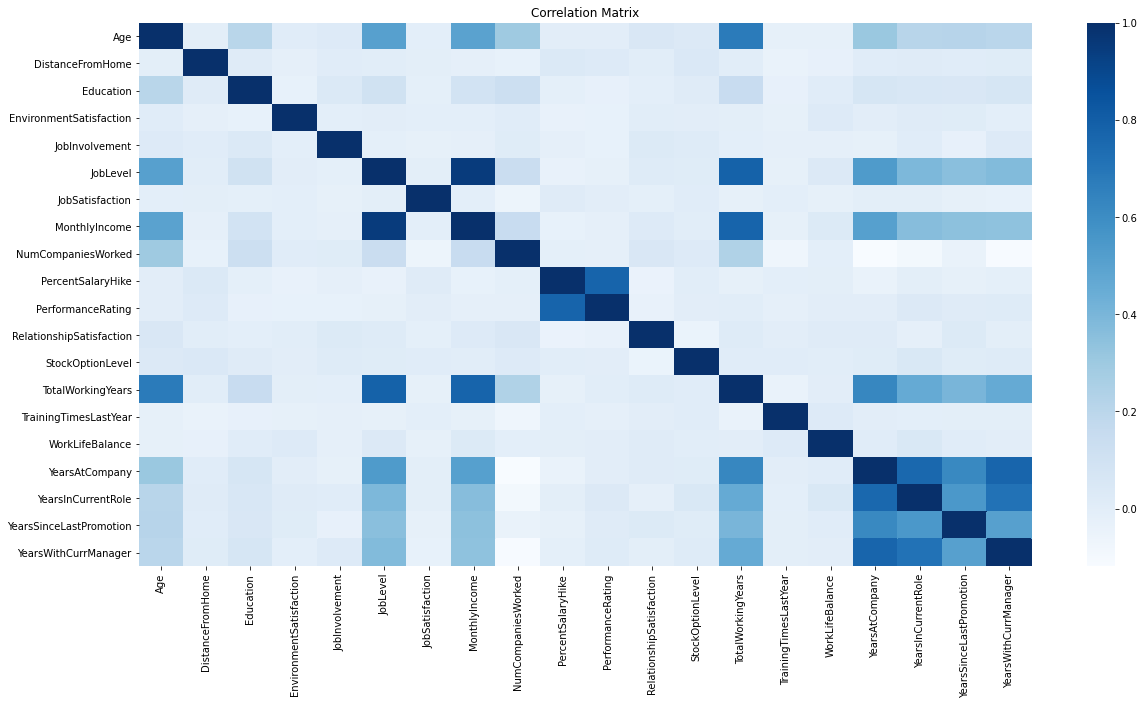

In [28]:
plt.figure(figsize=(20,10))
corr_numeric = data[numerical_columns].corr()
sns.heatmap(corr_numeric, xticklabels = corr_numeric.columns.values, yticklabels = corr_numeric.columns.values, cmap="Blues")
plt.title('Correlation Matrix')
plt.savefig('Corrlation_Matrix')

In [29]:
sol = (corr_numeric.where(np.triu(np.ones(corr_numeric.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = round(sol, 2)

In [30]:
sol[sol >= 0.5]

JobLevel                 MonthlyIncome              0.95
                         TotalWorkingYears          0.78
PercentSalaryHike        PerformanceRating          0.77
MonthlyIncome            TotalWorkingYears          0.77
YearsAtCompany           YearsWithCurrManager       0.77
                         YearsInCurrentRole         0.76
YearsInCurrentRole       YearsWithCurrManager       0.71
Age                      TotalWorkingYears          0.68
TotalWorkingYears        YearsAtCompany             0.63
YearsAtCompany           YearsSinceLastPromotion    0.62
YearsInCurrentRole       YearsSinceLastPromotion    0.55
JobLevel                 YearsAtCompany             0.53
MonthlyIncome            YearsAtCompany             0.51
YearsSinceLastPromotion  YearsWithCurrManager       0.51
Age                      JobLevel                   0.51
                         MonthlyIncome              0.50
dtype: float64

The above marks all the important relationships between variables, I am using 0.5 correlation as the benchmark for determining the benchmark because anything above 0.5 marks a moderatly positive relationship. 


The above data explain the following expected concepts: 

The greater the age of an employee the greater the total working years, which is expected as both values on keep going positive (while still working). It also shows how there is a strong correlation with salary and job level as the higher the job level generally indicates more important roles and more valuable the employee, which lead to an increase in the salary. To add, having a higher correlation with TotalWorkingYears was also expected as the more you work the greater the increase in knowledge and experience with the work which would greater the chances of going up higher in the hierarchy and increase the monthly income. It also shows how the higher joblevel of an individual the higher the number of years the employee has worked in the company. This is generally a preferable way of companies working because ideally they would want people at higher positions to come up the ranks from the same company because they would have a better understanding of the way the things functions at the company and have a better understanding of the industry and the way the company works etc. There seems to be a highly positive relationship between the performance rating and the salary hike, which indicates that people who perform well get rewarded for the work put in. The more the number of years an employee works in the currently role, the greater the number of years since the last promotion. 


Interesting concepts it explains: 

The highly positive relationship between years an employee is at the company and the number of years they are with the current manager implies that generally during the employees time at the company their manager does not change; to add, it also shows that the there is a strong relationship with the number of years it is in the current role which could indicate that getting promotions could be difficult at the company (however, as the job level gets higher it becomes difficult to get promotions as well). It also shows that when you are in the same role, the likelihood is that the manager will be the same while the employee is in that role. 



In [31]:
def densityplot(x,data,finalvalue = "Attrition"):
    fig = plt.figure(figsize=(15,4))
    ax=sns.kdeplot(data.loc[(data[finalvalue] == "Yes"),x] , color='r',shade=True, label='Turnover')
    ax=sns.kdeplot(data.loc[(data[finalvalue] == "No"),x] , color='b',shade=True, label='No Turnover')
    title = str(x) + " Distribution - Turnover V.S. No Turnover"
    plt.title(title)
    plt.xlabel(str(x))
    title += '.png'
    plt.savefig(title)

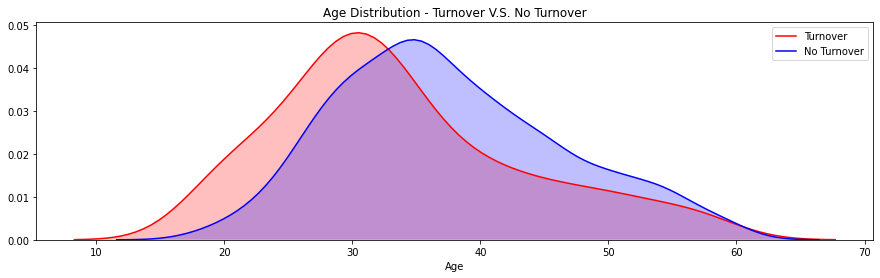

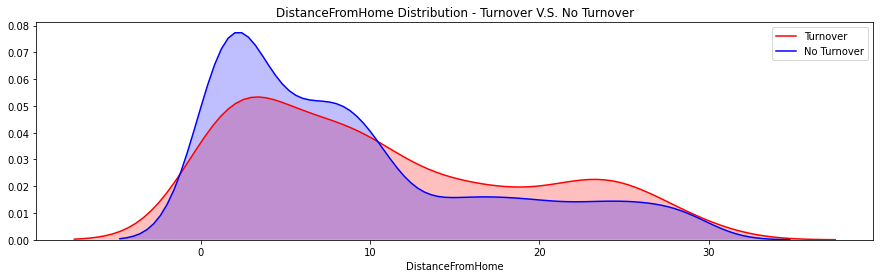

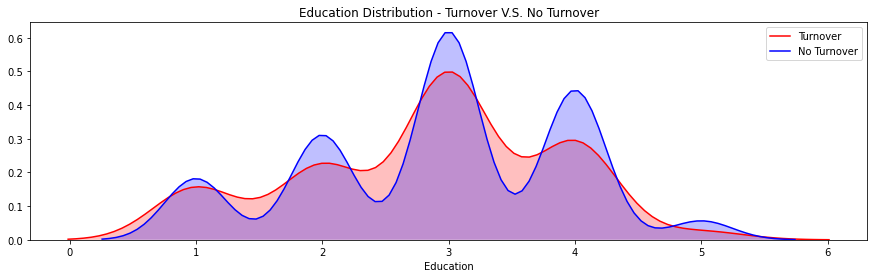

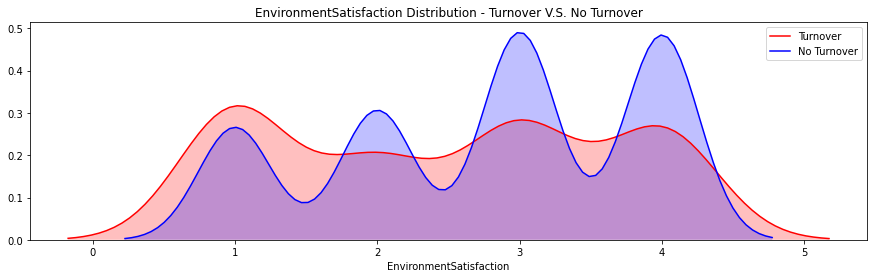

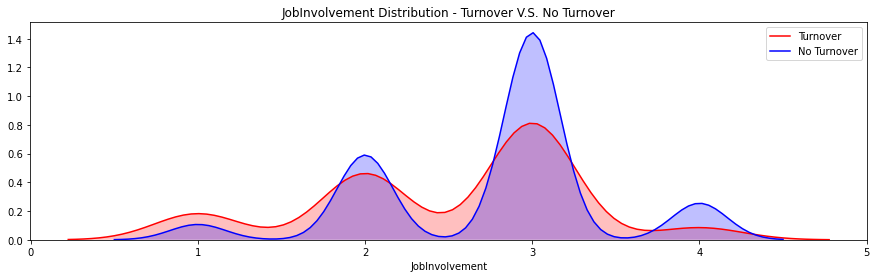

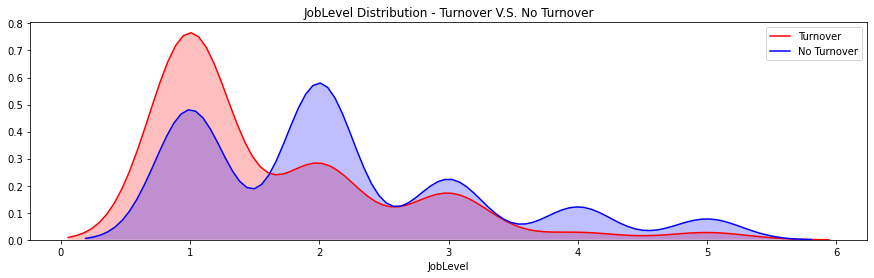

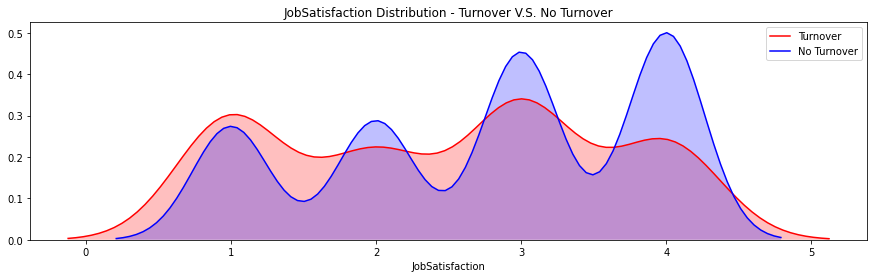

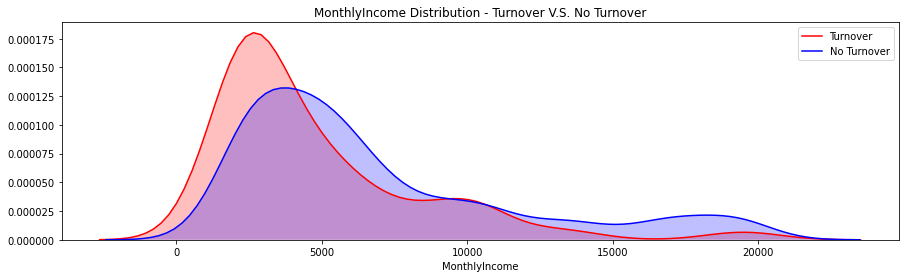

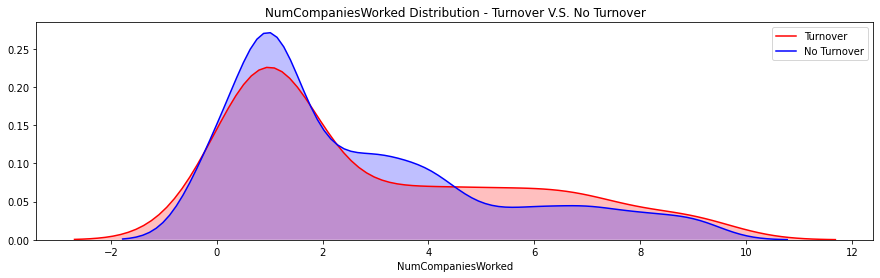

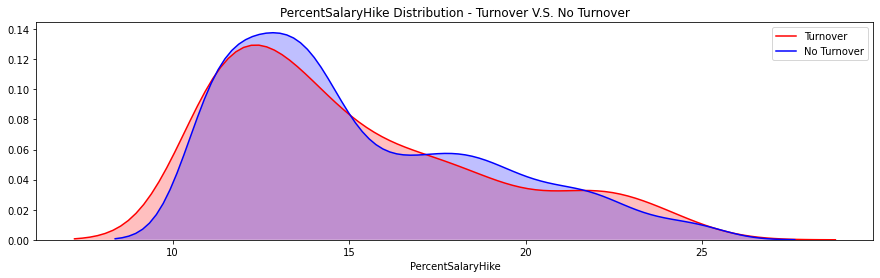

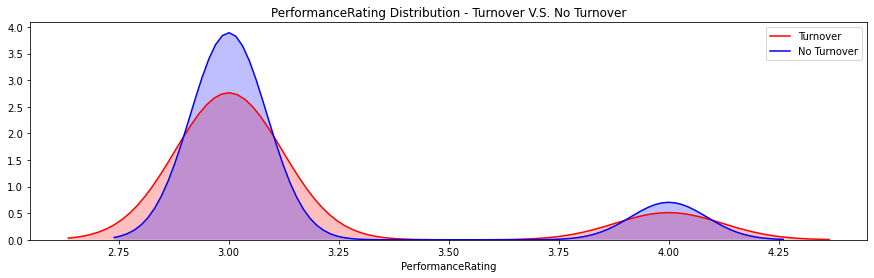

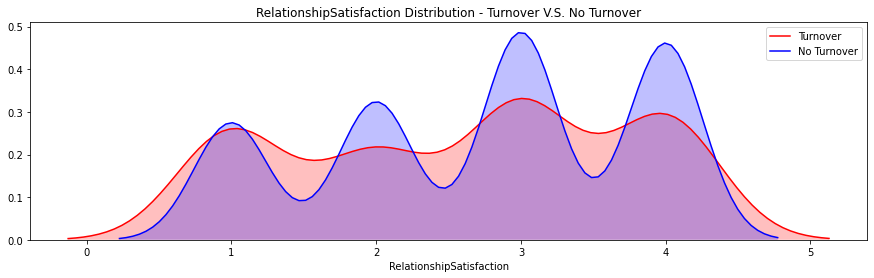

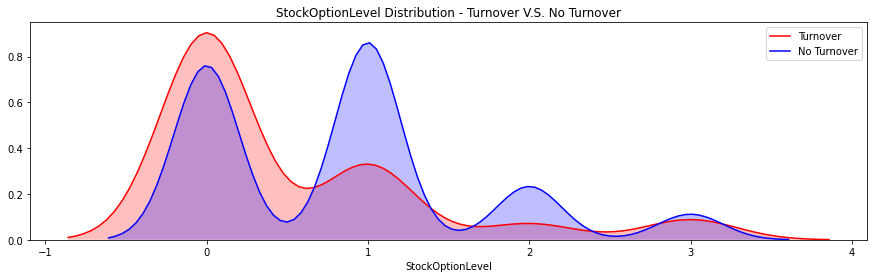

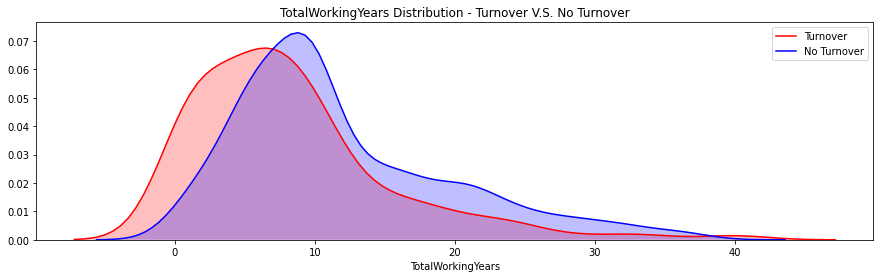

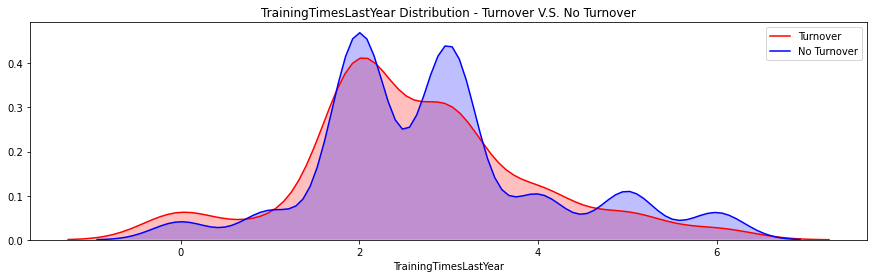

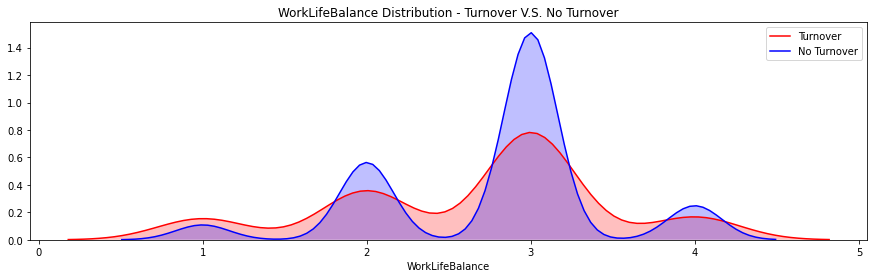

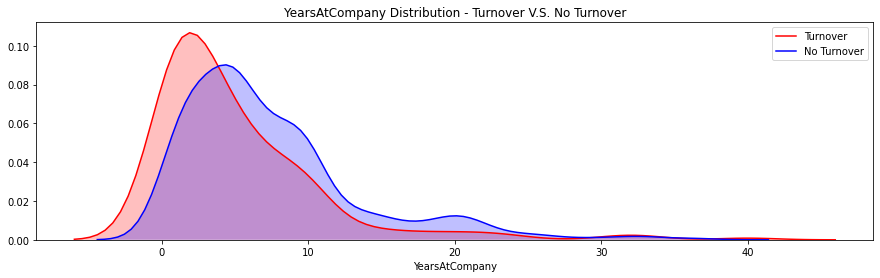

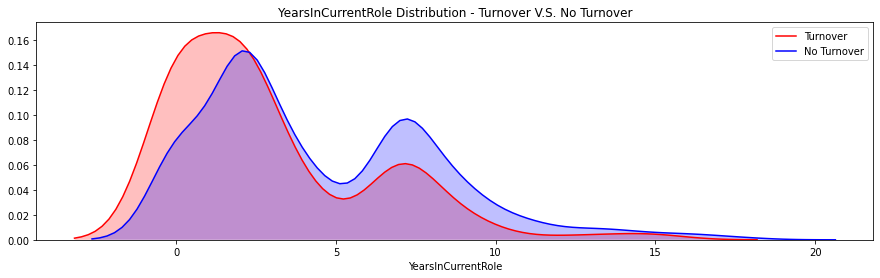

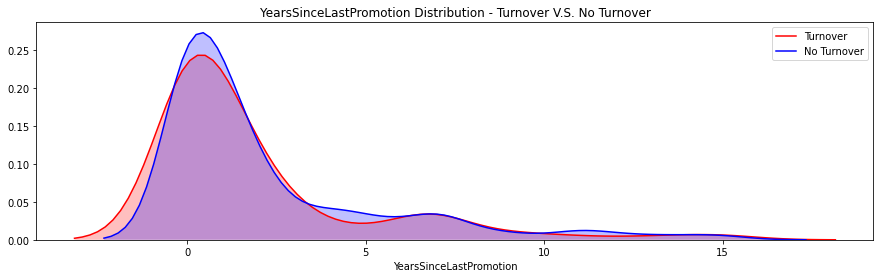

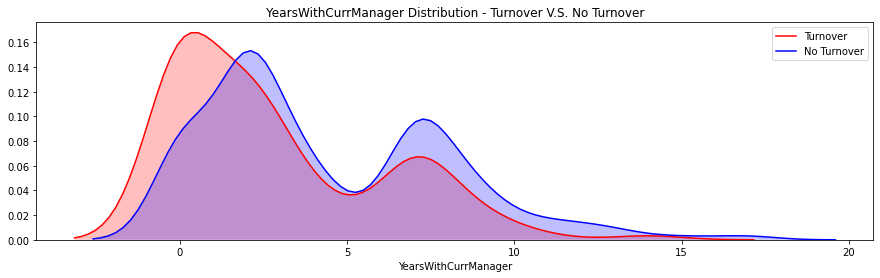

In [32]:
for x in corr_numeric.columns: 
    densityplot(x, data)

The above shows how each numeric value has an impact with the final predicting variable (attrition).

The Most Important Distributions: 

Age/TotalWorkingYears: The age shows that until the age of 35 people are very likely to leave the company and less likely after that. The reason for individuals leaving the company less after 35 is probably due to the fact that they are settled in the role (especially if they have worked for a long time, there is a high chance they are in a higher role and are being well compensated, to add they are more likley to have started a family and have kids which would make them less likely to leave the company). However, below the age of 35, individuals are going to get up the ranks as soon as they can, so they would be in the look out for opportunities to grow and for better pay so they can have better settled life, to add because they is a less likely chance that individals beleow the age of 30 are to be married and have kids, they would be more willing to take risks and move. Individuals who are above 55 are likely to leave because of retirement. 


Distance Frome Home (Units not determined, assume means miles) : Individuals don't like to live far away from work because it means there is a lot of time spent in the day in commute, which can affect their work life balance and relationship satisfaction because they are not able to spend time doing what they want to, which could also lead to a decrease in environment satisfaction. However, I think in the future this factor will play a lower and lower impact because companies (if they can afford to and have the ability to) can switch to remote working or reducing the number of times the individual has to come to the office, which in turn can reduce the impact of this factor in making an employee decide to leave the company. 



Environment/Job Satisfaction/ WorkLifeBalance: Individuals who are below a a rating of 3 are very likely to leave the company because they are not happy with the work place which can make them not enjoy their work and can make work seem more and more like an obligation. To add, with lower enivornment satisfaction can reduce the job productivity of an individual which can reduce the chances of getting a high performance rating which seems to result in higher percentage hikes. 


Job Invovlement: Employees like to feel involved in their work, which has the ability to make their work more engaging and interesting. When individuals are not involved in their work (below 3); there are likely to leave the company because they probably don't feel valued and feel like their work is of little use which can provide them little motivation to work harder and get the chance of promotion/higher salary. 

Job Level: Employees who are in the lower end of the hierarchy are more likely to leave becaue they are looking for opportunities to get up and are less likely to be compensated well; as compared to individuals who are above job level of 2 who are more likely to feel settled and less likely to leave because they are likely to be well compensated for their job, which can provide less incentive to leave the company. 



Monthly Income (assuming dollars, data did not mention) : There is quite a divide in the split, it seems as if 5000 dollars is the bench mark for a good salary, because individuals are very likely to leave the company (probably in search for opportunities for more jobs with more money) who earn less than the benchmark compared to individuals who earn more than the threshold amount. 

Stock Option: This is a factor where either individual has it (if they do at which level) or does not; individuals who don't contain the any stock in the company are very likely to leave the company; it seem as if stock option makes employee less likely to leave the company.

Years at Company: Individuals are very likely to leave the company when they have worked for the company for less than 7 years; it seems as if after hitting 7 years individuals get more comfortable with the company and can develope some kind of emotional attachment to the company which can make them less likely to leave. 

In [33]:
def turnover_percentage(data, variable, targetvariable):
    for x in data[variable].unique():
        print(x)
        category = data[data[variable]==x]
        print(category.shape[0])
        for y in category[targetvariable].unique():
            print(y)
            category_y = category[category[targetvariable] == y]
            print(category_y.shape[0]/category.shape[0])

def variablevsturnover(x,data,finalvalue = "Attrition"):
    title = "Employee" + str(x) +  " Distribution"
    sns.countplot(x=x, data=data).set_title(title)
    f, ax = plt.subplots(figsize=(15, 5))
    title = "Employee" + str(x) +  " Turnover Distribution"
    sns.countplot(y=x, hue=finalvalue, data=data).set_title(title)
    plt.yticks(rotation=60)
    plt.show()
    turnover_percentage(data,x, finalvalue)

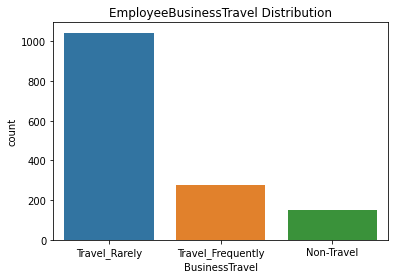

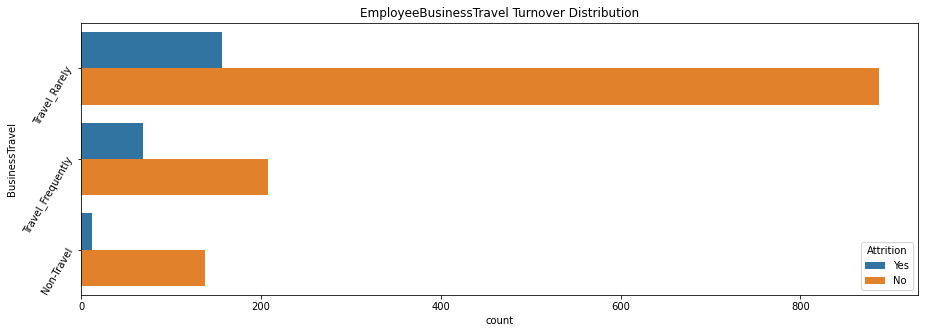

Travel_Rarely
1043
Yes
0.14956855225311602
No
0.850431447746884
Travel_Frequently
277
No
0.7509025270758123
Yes
0.2490974729241877
Non-Travel
150
No
0.92
Yes
0.08


In [36]:
variablevsturnover('BusinessTravel',data)

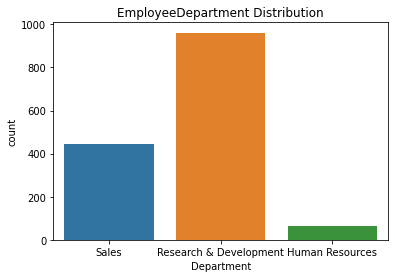

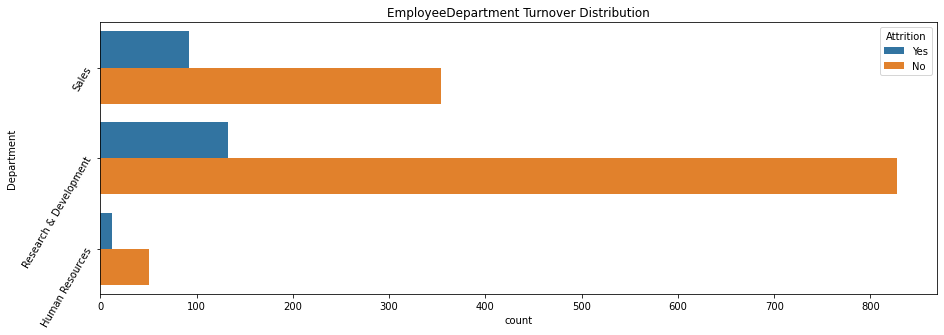

Sales
446
Yes
0.2062780269058296
No
0.7937219730941704
Research & Development
961
No
0.8616024973985432
Yes
0.1383975026014568
Human Resources
63
No
0.8095238095238095
Yes
0.19047619047619047


In [37]:
variablevsturnover('Department',data)

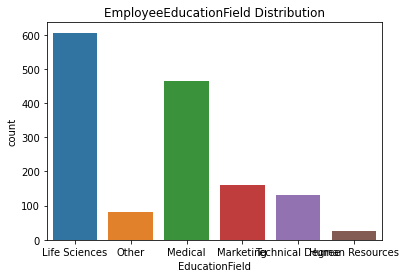

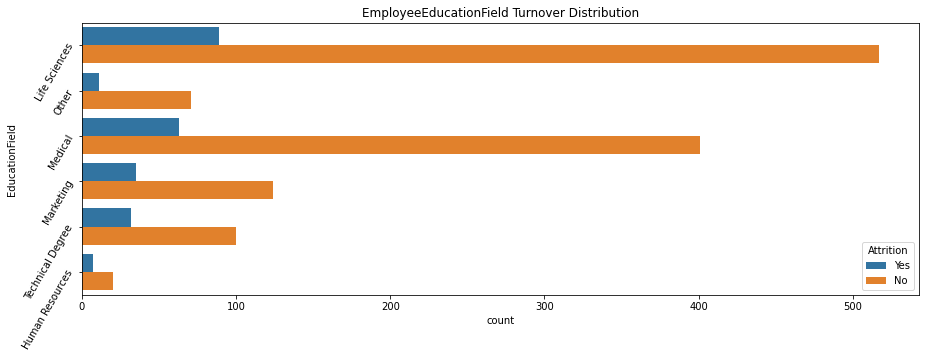

Life Sciences
606
Yes
0.14686468646864687
No
0.8531353135313532
Other
82
Yes
0.13414634146341464
No
0.8658536585365854
Medical
464
No
0.8642241379310345
Yes
0.13577586206896552
Marketing
159
No
0.779874213836478
Yes
0.22012578616352202
Technical Degree
132
Yes
0.24242424242424243
No
0.7575757575757576
Human Resources
27
Yes
0.25925925925925924
No
0.7407407407407407


In [38]:
variablevsturnover('EducationField',data)

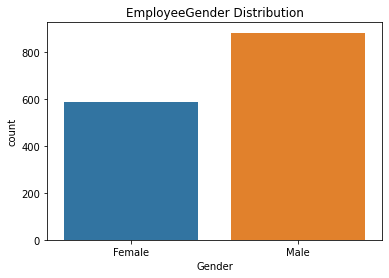

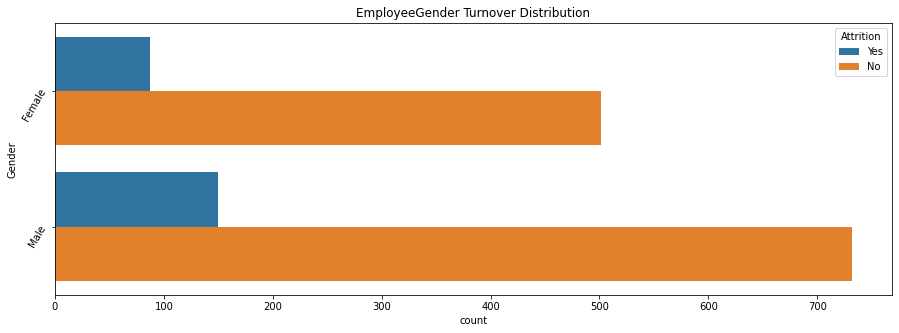

Female
588
Yes
0.14795918367346939
No
0.8520408163265306
Male
882
No
0.8299319727891157
Yes
0.17006802721088435


In [39]:
variablevsturnover('Gender',data)

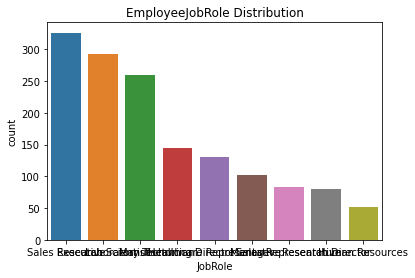

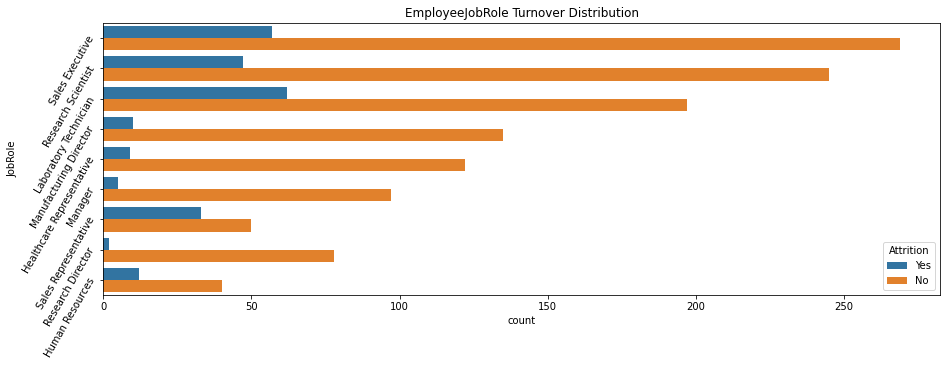

Sales Executive
326
Yes
0.17484662576687116
No
0.8251533742331288
Research Scientist
292
No
0.839041095890411
Yes
0.16095890410958905
Laboratory Technician
259
Yes
0.23938223938223938
No
0.7606177606177607
Manufacturing Director
145
No
0.9310344827586207
Yes
0.06896551724137931
Healthcare Representative
131
No
0.9312977099236641
Yes
0.06870229007633588
Manager
102
No
0.9509803921568627
Yes
0.049019607843137254
Sales Representative
83
Yes
0.39759036144578314
No
0.6024096385542169
Research Director
80
No
0.975
Yes
0.025
Human Resources
52
No
0.7692307692307693
Yes
0.23076923076923078


In [41]:
variablevsturnover('JobRole',data)

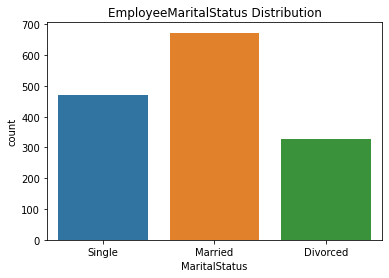

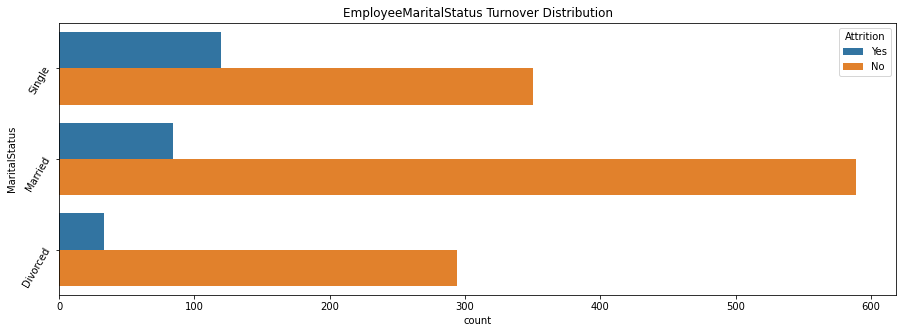

Single
470
Yes
0.2553191489361702
No
0.7446808510638298
Married
673
No
0.87518573551263
Yes
0.12481426448736999
Divorced
327
No
0.8990825688073395
Yes
0.10091743119266056


In [43]:
variablevsturnover('MaritalStatus',data)

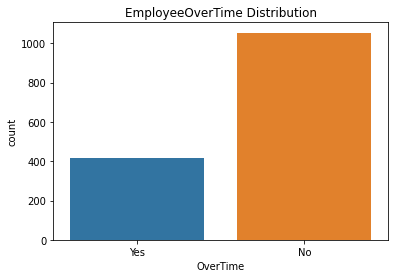

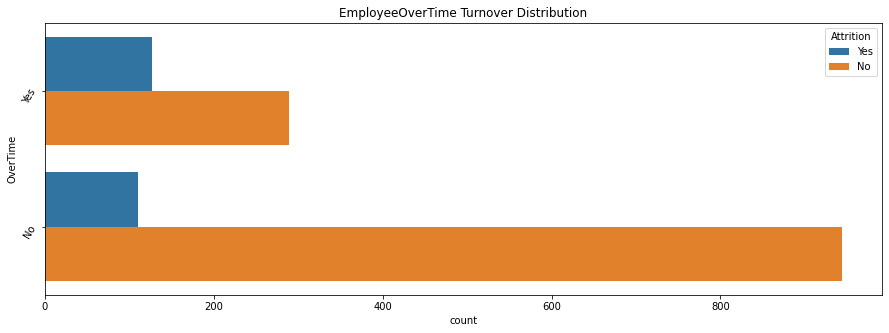

Yes
416
Yes
0.30528846153846156
No
0.6947115384615384
No
1054
No
0.8956356736242884
Yes
0.10436432637571158


In [44]:
variablevsturnover('OverTime',data)

Most important factors from the categorical features:

Maritul Status:
Employees who are single are more likely to leave the company, this could be due the fact that they have less factors to worry about and are probably still young and looking to find their feet in the industry; whereas when one is married they have to think about a lot of factors before moving companies because it can affect their family (particularly if they have kids). 

Business Travel:


Employees who travel frequently have a high chance of leaving this good be because they don’t get to spend a lot of time with family and can affect their work life balance quite a lot. 


Job Role:

Job roles mirror what the job level was saying from the numerical features individuals who have a higher job level for example Directors and Managers are more likely to stay the in company. This could be due to the fact that they are very highly valued and are well compensated for the job they do. However , individuals who work as a Sales Representative and in Human Resources are the most likely individuals to leave the company based on the statistics. 

OverTime:

The most important feature that the grid shows is that overtime play a very big impact on those who leave the company and those who don’t. A lot of the employees who leave the company tend to be working overtime. Working overtime would generally imply that the individual has less time to for their family and work life balances which would result in them not being satisfied with their job as they could feel like the job is taking over their life and not an aspect of it. 